## Observations and Insights 

This study was of 10 drug regimens.  Our product Capomulin was compared to the other 9, and then further compared to three other drug regimens with the lowest standard error: Ramicane, Ceftimin, and Infubinol.

This study was on 249 mice.  The gender of the mice was distributed evenly between Male and Female.

At the end of the study, mice receiving Capomulin and Ramicane had lower tumor volumes than the other two drug regimens in the comparison.

Of the 4 studied drug regimens, Infubinol was the only study that produced outliers in our analysis.

There is an observed strong correlation between mouse weight and tumor weight.  It appears that Capomulim and Ramicane were given to smaller sized mice on average.  This could skew our results.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_merge = pd.merge(study_results,mouse_metadata, how = "outer", on="Mouse ID")

# Display the data table for preview
mouse_merge


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [2]:
# Checking the number of mice.
# **https://stackoverflow.com/questions/26977076/pandas-unique-values-multiple-columns

mousecount=pd.unique(mouse_merge['Mouse ID'].values.ravel('K'))
np.count_nonzero(mousecount)



249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

# ***** Finding Duplicates ** https://stackoverflow.com/questions/47180983/find-duplicate-rows-in-a-pandas-dataframe
mouse_dups = mouse_merge[mouse_merge.duplicated(subset=['Mouse ID','Timepoint'], keep='first')]
mouse_dups
  


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
861,g989,0,45.000000,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 



In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
# *** https://www.geeksforgeeks.org/python-pandas-dataframe-drop_duplicates/

mouse_merge.drop_duplicates(subset =["Mouse ID", 'Timepoint'], 
                     keep = 'first', inplace = True) 
mouse_merge

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [6]:
# Checking the number of mice in the clean DataFrame.

mousecount2=pd.unique(mouse_merge['Mouse ID'].values.ravel('K'))

np.count_nonzero(mousecount2)

249

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.
mouse_merge_bydrug = pd.DataFrame(mouse_merge.groupby(['Drug Regimen']).count())
mouse_merge_bydrug["Mean"] = pd.DataFrame(mouse_merge.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].mean())
mouse_merge_bydrug["Median"] = pd.DataFrame(mouse_merge.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].median())
mouse_merge_bydrug["Var"] = pd.DataFrame(mouse_merge.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].var())
mouse_merge_bydrug["Std"] = pd.DataFrame(mouse_merge.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].std())
mouse_merge_bydrug["SEM"] = pd.DataFrame(mouse_merge.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].sem())

mouse_merge_bydrug = mouse_merge_bydrug[["Mouse ID","Mean","Median","Var","Std","SEM"]]

mouse_merge_bydrug


,Mouse ID,Mean,Median,Var,Std,SEM
Drug Regimen,,,,,,
Capomulin,230,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,178,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,178,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,188,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,186,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,181,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,156,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,228,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,181,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function


## Bar and Pie Charts

In [9]:
# Create a series that looks for a Drug Regimen by name and then traces the mice per timeplot
micebydrugtime = pd.DataFrame(mouse_merge.groupby(['Drug Regimen', 'Timepoint'])['Tumor Volume (mm3)'].count())

micebydrugtime = micebydrugtime.reset_index()

# micebydrugtime

# ***https://www.geeksforgeeks.org/python-pandas-pivot/

micebydrugtime = micebydrugtime.pivot(values='Tumor Volume (mm3)' , index = 'Timepoint', columns = 'Drug Regimen' )


micebydrugtime

Drug Regimen,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,25,25,24,25
5,25,21,25,23,23,24,24,25,23,24
10,25,20,21,22,21,24,22,24,21,22
15,24,19,21,19,21,20,16,24,21,21
20,23,18,20,19,20,19,16,23,19,17
25,22,18,18,19,18,17,14,23,18,16
30,22,16,17,18,15,15,13,23,17,15
35,22,14,12,17,15,14,10,21,15,14
40,21,14,10,15,15,12,9,20,12,14


Which of the following drug regimens would you like to look at: Capomulin, Ceftamin, Infubinol, Ketapril, Naftisol, Placebo, Propriva, Ramicane, Stelasyn, Zoniferol?   Ramicane


Text(0, 0.5, 'No. of Mice')

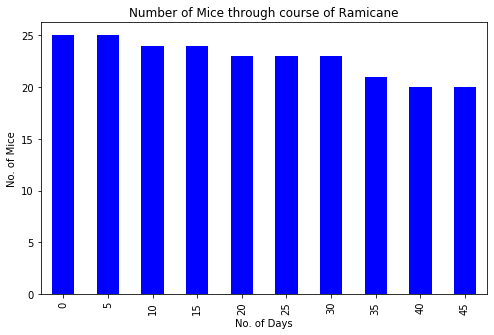

In [10]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 

DrugReg = input("Which of the following drug regimens would you like to look at: Capomulin, Ceftamin, Infubinol, Ketapril, Naftisol, Placebo, Propriva, Ramicane, Stelasyn, Zoniferol?   ") 
# DrugReg = "Capomulin"

plotdata = micebydrugtime[[DrugReg]]
plotdata.plot(kind="bar", figsize = (8,5), color = "b", legend=False)
plt.title("Number of Mice through course of " + DrugReg)
plt.xlabel("No. of Days")
plt.ylabel("No. of Mice")

Text(0, 0.5, 'No. of Mice')

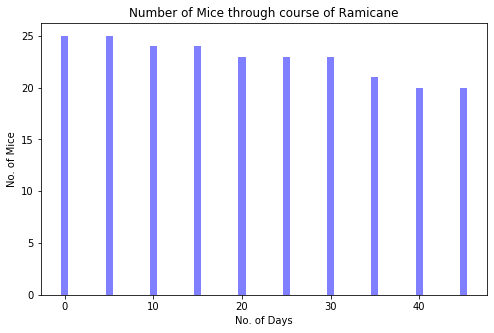

In [11]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
plotdata = plotdata.reset_index()
# plotdata
x_axis = plotdata['Timepoint']
plt.figure(figsize=(8,5))
tick_locations = [value for value in x_axis]
plt.bar(x_axis, plotdata[DrugReg], color='b', alpha=0.5, align="center")
# plt.xticks(tick_locations, plotdata["Timepoint"], rotation="vertical")  
plt.title("Number of Mice through course of " + DrugReg)
plt.xlabel("No. of Days")
plt.ylabel("No. of Mice")



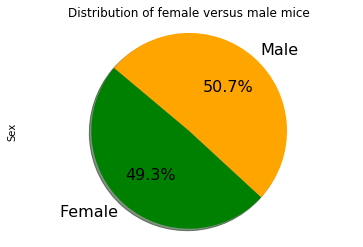

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_df = mouse_merge.groupby('Sex')
gendercount = pd.DataFrame(gender_df['Sex'].count())
# gendercount
gendercount.plot(kind='pie',y='Sex',\
                title = 'Distribution of female versus male mice', startangle=140,\
                autopct='%1.1f%%',shadow=True, fontsize=16, colors = ["green", "orange"],legend =False)
plt.axis("equal")
plt.show()


# gender_df = pd.DataFrame(mouse_metadata.groupby(['Sex']).count())
# gender_df = gender_df[["Mouse ID"]]
# gender_df
# gendercount = gender_df[["Mouse ID"]]
# gendercount
# gendercount.plot.pie(subplots=True)


(-1.1179900164988374,
 1.1067252436799584,
 -1.1132609815137346,
 1.1081858927805142)

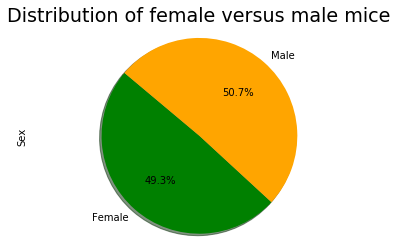

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

genders = list(gendercount.index.values)
gendernumber = gendercount['Sex']
colors = ["green", "orange"]
plt.pie(gendernumber,labels=genders,colors=colors,autopct="%1.1f%%", shadow=True, startangle=140)
plt.rcParams['font.size'] = 16
plt.title('Distribution of female versus male mice')
plt.ylabel('Sex')
plt.axis("equal")





# plt.axis("equal")
# plt.show()


## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

fourdrugslist = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
#***https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.isin.html

fourdrugs = mouse_merge[mouse_merge['Drug Regimen'].isin(fourdrugslist)]
                                                         
# fourdrugs                                                         
# # Start by getting the last (greatest) timepoint for each mouse

fourdrugs = fourdrugs.sort_values("Timepoint", ascending = False)
fourdrugs_last_timepoint = fourdrugs.drop_duplicates(subset="Mouse ID", keep = 'first')
                                
fourdrugs_last_timepoint


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
1892,m601,45,28.430964,1,Capomulin,Male,22,17
1700,s185,45,23.343598,1,Capomulin,Female,3,17
1364,y865,45,64.729837,3,Ceftamin,Male,23,26
1497,x581,45,64.634949,3,Ceftamin,Female,19,28
1844,l897,45,38.846876,1,Capomulin,Male,17,19
...,...,...,...,...,...,...,...,...
1427,m756,5,47.010364,1,Infubinol,Male,19,30
1467,b447,0,45.000000,0,Ceftamin,Male,2,30
1649,t573,0,45.000000,0,Ceftamin,Female,15,27
1401,u153,0,45.000000,0,Ceftamin,Female,11,25


In [15]:
fourdrugs_last_timepointP = fourdrugs_last_timepoint.pivot(values='Tumor Volume (mm3)' , index = 'Mouse ID', columns = 'Drug Regimen' )
fourdrugs_last_timepointP

Drug Regimen,Capomulin,Ceftamin,Infubinol,Ramicane
Mouse ID,,,,
a203,NaN,NaN,67.973419,NaN
a251,NaN,NaN,65.525743,NaN
a275,NaN,62.999356,NaN,NaN
a411,NaN,NaN,NaN,38.407618
a444,NaN,NaN,NaN,43.047543
...,...,...,...,...
y769,NaN,68.594745,NaN,NaN
y793,31.896238,NaN,NaN,NaN
y865,NaN,64.729837,NaN,NaN


In [16]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    
for drug in fourdrugslist:
    quartiles = fourdrugs_last_timepointP[drug].quantile([.25,.5,.75]).round(2)
    lowerq=quartiles[.25].round(2)
    upperq=quartiles[.75].round(2)
    iqr=round(upperq - lowerq,2)
    lower_bound = round(lowerq - (1.5*iqr),2)
    upper_bound = round(upperq + (1.5*iqr),2)
    print("---------------------------------------------------------")
    print(f"{drug} IQR data is:")
    print(f"The lower quartile of {drug} is: {lowerq}")
    print(f"The upper quartile of {drug} is: {upperq}")
    print(f"The IQR of {drug} is: {iqr}")
    print(f"The Median of  {drug} is: {quartiles[.5]}")      
    print(f"outliers could be below {lower_bound} or above {upper_bound}")      
    





---------------------------------------------------------
Capomulin IQR data is:
The lower quartile of Capomulin is: 32.38
The upper quartile of Capomulin is: 40.16
The IQR of Capomulin is: 7.78
The Median of  Capomulin is: 38.13
outliers could be below 20.71 or above 51.83
---------------------------------------------------------
Ramicane IQR data is:
The lower quartile of Ramicane is: 31.56
The upper quartile of Ramicane is: 40.66
The IQR of Ramicane is: 9.1
The Median of  Ramicane is: 36.56
outliers could be below 17.91 or above 54.31
---------------------------------------------------------
Infubinol IQR data is:
The lower quartile of Infubinol is: 54.05
The upper quartile of Infubinol is: 65.53
The IQR of Infubinol is: 11.48
The Median of  Infubinol is: 60.17
outliers could be below 36.83 or above 82.75
---------------------------------------------------------
Ceftamin IQR data is:
The lower quartile of Ceftamin is: 48.72
The upper quartile of Ceftamin is: 64.3
The IQR of Ceftamin

In [17]:
# print(Drug_Regimen.size)

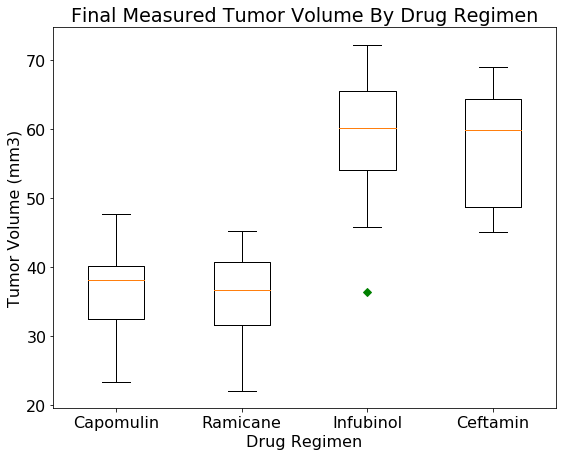

In [18]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

fourdrugs = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
boxplotforeach = []
for drug in fourdrugs:
    boxplotforeach.append(list(fourdrugs_last_timepointP[drug].dropna()))
    
# boxplotforeach


# Tumor_volume = Four_Treatments_dropped_df[["Tumor Volume (mm3)",]
fig1, ax = plt.subplots(figsize=(9,7))
ax.set_title("Final Measured Tumor Volume By Drug Regimen")
ax.set_xlabel("Drug Regimen")
ax.set_ylabel("Tumor Volume (mm3)")
ax.boxplot(boxplotforeach,notch=0,sym='gD')
plt.xticks([1,2,3,4],fourdrugs)
plt.show()


## Line and Scatter Plots

Text(0.5, 1.0, 'Tumor Volume over time for mice on Capomulin')

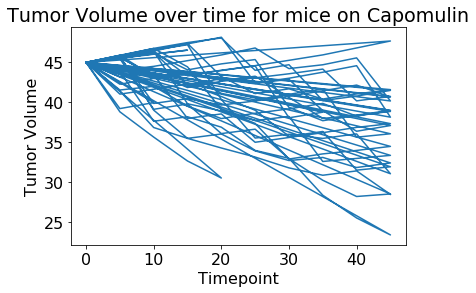

In [19]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
capomulin_data = mouse_merge.loc[(mouse_merge["Drug Regimen"]=="Capomulin"),:]
# Capomulin_data
timepoint_capomulin = capomulin_data["Timepoint"]
tumor_capomulin = capomulin_data["Tumor Volume (mm3)"]
tumor_capomulin_line = plt.plot(timepoint_capomulin, tumor_capomulin)

plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume")
plt.title("Tumor Volume over time for mice on Capomulin")


Text(0.5, 1.0, 'Tumor Volume and Weight for mice on Capomulin')

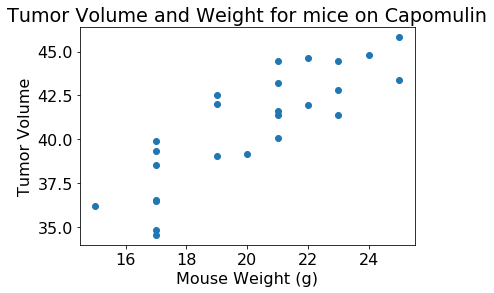

In [20]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

mouseweight = capomulin_data.groupby(capomulin_data["Mouse ID"])["Weight (g)"].mean() 
tumorvol = capomulin_data.groupby(capomulin_data["Mouse ID"])["Tumor Volume (mm3)"].mean()
                                  
plt.scatter(mouseweight,tumorvol)
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Tumor Volume")
plt.title("Tumor Volume and Weight for mice on Capomulin")
                                  

## Correlation and Regression

The correlation between mouse weight and tumor volume is 84.0%


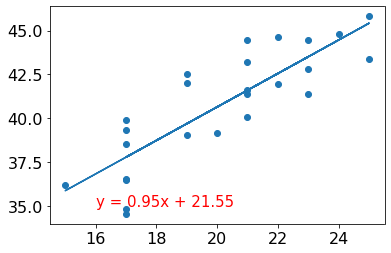

In [21]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

(slope, intercept, rvalue, pvalue, stderr) = linregress(mouseweight,tumorvol)
regress_values = slope * mouseweight + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(mouseweight,tumorvol)
plt.plot(mouseweight,regress_values)
plt.annotate(line_eq,(16,35),fontsize=15,color="red")
corr=round(st.pearsonr(mouseweight,tumorvol)[0],2)*100
print(f"The correlation between mouse weight and tumor volume is {corr}%")
           

In [22]:
Avg_weight = mouse_merge.groupby('Drug Regimen')['Weight (g)'].mean()
Avg_weight

Drug Regimen
Capomulin    19.965217
Ceftamin     27.398876
Infubinol    27.196629
Ketapril     27.861702
Naftisol     27.166667
Placebo      27.928177
Propriva     27.076923
Ramicane     19.679825
Stelasyn     27.856354
Zoniferol    27.692308
Name: Weight (g), dtype: float64